<a href="https://colab.research.google.com/github/Jung-ha1/machine-learning/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail() # 맨 끝에 있는 값 일부를 보여줌

2.5.0


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [ ]:
dataset.head() # 맨 앞에 있는 값 일부를 보여줌

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [ ]:
len(dataset) # dataset의 길이

398

In [ ]:
dataset = dataset.dropna() # 데이터에서 필요없는 값을 na 라고 하며 이것을 지우기 위해 씀
len(dataset)

392

In [ ]:
dataset.pop('Origin') # Origin = 제조사가 어디인지 뜻함

0      1
1      1
2      1
3      1
4      1
      ..
393    1
394    2
395    1
396    1
397    1
Name: Origin, Length: 392, dtype: int64

In [ ]:
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
0,18.0,8,307.0,130.0,3504.0,12.0,70
1,15.0,8,350.0,165.0,3693.0,11.5,70
2,18.0,8,318.0,150.0,3436.0,11.0,70
3,16.0,8,304.0,150.0,3433.0,12.0,70
4,17.0,8,302.0,140.0,3449.0,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82
394,44.0,4,97.0,52.0,2130.0,24.6,82
395,32.0,4,135.0,84.0,2295.0,11.6,82
396,28.0,4,120.0,79.0,2625.0,18.6,82


In [ ]:
train_dataset = dataset.sample(frac = 0.8, random_state = 0)
test_dataset = dataset.drop(train_dataset.index)

'''
frac = 데이터의 80%는 train으로 사용하고
train_dataset.index = 남은 20%는 test로 사용 할 것이다.
'''

len(train_dataset), len(test_dataset)

(314, 78)

In [ ]:
# 데이터 정규화 = 데이터를 통일시키는 것
# 정규화를 하기 위해서 평균값과 표준편차가 필요하다

train_stats = train_dataset.describe() # 평균과 표준편차 구하는 함수
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0


In [ ]:
# MPG는 맞추어야 하는 값이기 떄문에 정규화 작업에서 배제한다.

#train_labels = train_dataset.pop('MPG')
#test_labels = test_dataset.pop('MPG')

def norm(x) :
  return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

normed_train_data.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
146,-0.869348,-1.009459,-0.784052,-1.025303,-0.379759,-0.516397
282,-0.869348,-0.530218,-0.442811,-0.118796,0.624102,0.843910
69,1.483887,1.482595,1.447140,1.736877,-0.738281,-1.060519
378,-0.869348,-0.865687,-1.099044,-1.025303,-0.308055,1.660094
331,-0.869348,-0.942365,-0.994047,-1.001603,0.875068,1.115971


In [31]:
normed_train_data.shape 
'''
314 = 314줄이 있다는 것을 알려주고 데이터 추가 삭제에 따라 수가 달라지기 때문에 가변적이다.
6 = 칼럼이 6개 있다는 것이며, Cylinders ~ Model Year까지의 수이다. 따라서 고정되어있다.
# 6이란 수는 고정되기 때문에 이를 중심으로 한다.
'''

(314, 6)

In [38]:
inputs = keras.Input(shape = (normed_train_data.shape[1],))
#shape[1] = 6
h = layers.Dense(64)(inputs) # 행렬의 사이즈를 정해주는 것. 수는 어떤 것이든 상관 없다.

# input과 output사에이 있는 layer을 hidden layer이라고 한다.
# 이를 추가 하고 싶을 떄 밑에 있는 것과 같이 써주면 된다. 수는 상관이 없다.
h = layers.Dense(32)(h)

outputs = layers.Dense(1)(h) # MPG 하나의 항목에 닶을 맞추어야 하기 때문에 1로 지정

model = keras.Model(inputs = inputs, outputs = outputs)

model.compile(loss = 'mse', optimizer = tf.keras.optimizers.RMSprop(0.001))
'''
compile = 모델이 학습하게 만들어 준다.

layer(실제 모델) <--> y = x * W + b (모델)   -> 두개의 차이를 줄여나가는 것이 머신러닝의 원리

optimizer = 모델이 오차가 발생을 했을 때 W와 b의 값을 어떻게 변경할지에 대해 관리함

'''

model.summary() # summary 메서드를 사용해 모델의 간단한 정보 출력

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 6)]               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                448       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________


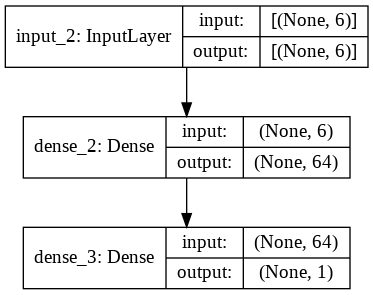

In [37]:
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes = True)
# layer에 따라 시각화를 좀 더 보기 쉽게 해주었다.

In [42]:
normed_train_data[:5] # 데이터의 일부분을 가져오는 것
normed_train_data[:5].shape

(5, 6)

In [43]:
example_batch = normed_train_data[:5]
example_result = model.predict(example_batch) # predict = 모델에 넣어 예측을 하고 싶을 때 쓰는 함수
example_result

array([[ 0.57673603],
       [-0.21669436],
       [ 0.24959892],
       [-0.95678705],
       [-0.42987305]], dtype=float32)

In [48]:
# 모델 학습

EPOCHS = 50  # epochs = 전체 데이터를 한번 훑는 것이 1 epochs이라고 한다.
             # 여기서는 50번을 반복한다.

history = model.fit(
    normed_train_data, train_labels,
    epochs = EPOCHS, validation_split = 0.2)

'''
fit = 학습을 시키는 함수이다.
fit 함수 안에 넣어야하는 값들 -> (input 데이터 = x, 결과값 = y, epoch 값)
validation = 모델을 계속 트래이닝 할 때 너무 똑똑해질 경우(과접합)를 막기 위해
             어느정도 수준까지만 학습하도록 막아주는 것

결과 값에 대한 설명

loss = 트레이닝에 대한 결과이며, 횟수가 지날수록 수가 작아진다.
'''

Epoch 1/10
8/8 [==============================] - 0s 14ms/step - loss: 12.3405 - val_loss: 13.8976
Epoch 2/10
8/8 [==============================] - 0s 4ms/step - loss: 12.6641 - val_loss: 12.1526
Epoch 3/10
8/8 [==============================] - 0s 5ms/step - loss: 12.2828 - val_loss: 12.3966
Epoch 4/10
8/8 [==============================] - 0s 4ms/step - loss: 12.6291 - val_loss: 12.0776
Epoch 5/10
8/8 [==============================] - 0s 4ms/step - loss: 12.4215 - val_loss: 12.4757
Epoch 6/10
8/8 [==============================] - 0s 4ms/step - loss: 12.4168 - val_loss: 11.7516
Epoch 7/10
8/8 [==============================] - 0s 8ms/step - loss: 12.4037 - val_loss: 11.8100
Epoch 8/10
8/8 [==============================] - 0s 4ms/step - loss: 12.3126 - val_loss: 11.9154
Epoch 9/10
8/8 [==============================] - 0s 6ms/step - loss: 12.5576 - val_loss: 12.0332
Epoch 10/10
8/8 [==============================] - 0s 4ms/step - loss: 12.6044 - val_loss: 12.4889


'\nfit = 학습을 시키는 함수이다.\nfit 함수 안에 넣어야하는 값들 -> (input 데이터 = x, 결과값 = y, epoch 값)\nvalidation = 모델을 계속 트래이닝 할 때 너무 똑똑해질 경우(과접합)를 막기 위해\n             어느정도 수준까지만 학습하도록 막아주는 것\n\n결과 값에 대한 설명\n\nloss = 트레이닝에 대한 결과이며, 횟수가 지날수록 수가 작아진다.\n'

In [52]:
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)
# callbacks.EarlyStopping = 언제 트레이닝을 멈추겠다를 지정해주는 함수
# patience = 10 : val_loss가 10번 반복해서 값이 변하지 않았을 때 학습을 멈추도록 해줌

model.fit(normed_train_data, train_labels, epochs = EPOCHS, 
          validation_split = 0.2, callbacks = [early_stop])
# early_stop을 callbacks으로 넘겨줌

Epoch 1/10
8/8 [==============================] - 0s 12ms/step - loss: 12.6757 - val_loss: 11.6497
Epoch 2/10
8/8 [==============================] - 0s 5ms/step - loss: 12.4061 - val_loss: 12.3365
Epoch 3/10
8/8 [==============================] - 0s 5ms/step - loss: 12.4015 - val_loss: 11.9377
Epoch 4/10
8/8 [==============================] - 0s 5ms/step - loss: 12.3978 - val_loss: 12.4941
Epoch 5/10
8/8 [==============================] - 0s 6ms/step - loss: 12.6998 - val_loss: 11.8540
Epoch 6/10
8/8 [==============================] - 0s 5ms/step - loss: 12.5525 - val_loss: 12.6946
Epoch 7/10
8/8 [==============================] - 0s 5ms/step - loss: 12.3118 - val_loss: 14.3841
Epoch 8/10
8/8 [==============================] - 0s 6ms/step - loss: 12.3441 - val_loss: 12.2754
Epoch 9/10
8/8 [==============================] - 0s 5ms/step - loss: 12.5202 - val_loss: 12.4062
Epoch 10/10
8/8 [==============================] - 0s 5ms/step - loss: 12.6660 - val_loss: 12.8892


In [51]:
# 모델에 대한 평가

loss = model.evaluate(normed_test_data, test_labels, verbose = 2)
print("테스트 세트의 평균 절대 오차 : {:5.2f} MPG".format(loss))

3/3 - 0s - loss: 10.8914
테스트 세트의 평균 절대 오차 : 10.89 MPG


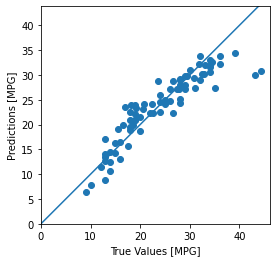

In [54]:
# 실제로 예측한 값을 직접 구하고 싶을 떄

test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions) # 실제 값과 예측 값을 비교하기
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])